#Setup

In [2]:
path = '/content/drive/MyDrive/Academia/degrees/MA in UofT/Courses/CME538: Data Science/Team Amateurs in the Dataverse/data'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import package and set defaults

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import to_hex

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
import folium
from folium import FeatureGroup

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
!pip install alphashape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 23.4 MB/s eta 0:00:00


In [10]:
import alphashape
from shapely.geometry import Point, Polygon, MultiPolygon,GeometryCollection


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)



##Import data


In [12]:
name = "car_with_n_and_p.json"
car = gpd.read_file(f"{path}/{name}")
car.head()

EVENT_UNIQUE_ID   OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY  \
0  GO-20141263029 2014-01-01   2014.00   January     1.00     1.00   
1  GO-20141261694 2014-01-01   2014.00   January     1.00     1.00   
2  GO-20149000046 2014-01-01   2014.00   January     1.00     1.00   
3  GO-20149000033 2014-01-01   2014.00   January     1.00     1.00   
4  GO-20141262977 2014-01-01   2014.00   January     1.00     1.00   

      OCC_DOW  OCC_HOUR DIVISION  \
0  Wednesday      15.00      D22   
1  Wednesday       1.00      D51   
2  Wednesday       0.00      D14   
3  Wednesday       3.00      D14   
4  Wednesday      14.00      D11   

                                       LOCATION_TYPE PREMISES_TYPE  \
0  Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
1  Commercial Dwelling Unit (Hotel, Motel, B & B,...    Commercial   
2  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
3  Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
4  Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   

                          OFFENCE HOOD_158 year_month  index_right    _id  \
0  Theft From Motor Vehicle Under      161    2014-01        44.00  45.00   
1  Theft From Motor Vehicle Under      166    2014-01        39.00  40.00   
2  Theft From Motor Vehicle Under      078    2014-01        80.00  81.00   
3  Theft From Motor Vehicle Under      081    2014-01       105.00 106.00   
4  Theft From Motor Vehicle Under      085    2014-01       102.00 103.00   

  neighbourhood_id                     neighbourhood_name  \
0              161                      Humber Bay Shores   
1              166  St Lawrence-East Bayfront-The Islands   
2              078                   Kensington-Chinatown   
3              081                      Trinity-Bellwoods   
4              085                         South Parkdale   

                         CLASSIFICATION CLASSIFICATION_CODE  \
0  Not an NIA or Emerging Neighbourhood                  NA   
1  Not an NIA or Emerging Neighbourhood                  NA   
2  Not an NIA or Emerging Neighbourhood                  NA   
3  Not an NIA or Emerging Neighbourhood                  NA   
4        Neighbourhood Improvement Area                 NIA   

   neighborhood_area  park_area  park_density  park_count  closest_park_index  \
0         1656622.57  456033.16         27.53       15.00                1568   
1        11875224.03 2792382.24         23.51       53.00                1890   
2         1610389.49   59567.09          3.70       10.00                1779   
3         1815085.68  188258.20         10.37        8.00                2830   
4         2400398.26  504977.86         21.04       29.00                1899   

          closest_park_name  closest_park_distance closest_park_category  \
0          TRCA LANDS ( 32)                  99.67             Near Park   
1               BERCZY PARK                 153.29             Near Park   
2      BELLEVUE SQUARE PARK                 140.17             Near Park   
3  FRED HAMILTON PLAYGROUND                 114.46             Near Park   
4       SUNNYSIDE BIKE PARK                  20.70               In Park   

  closest_park_type                             geometry  
0     Neighbourhood  MULTIPOINT (7217540.389 923750.421)  
1          Parkette  MULTIPOINT (7225614.616 928062.742)  
2          Parkette  MULTIPOINT (7223387.097 928306.715)  
3     Neighbourhood  MULTIPOINT (7221907.242 928266.306)  
4     Neighbourhood  MULTIPOINT (7218532.189 925500.512)

In [13]:
car.crs #make sure the right crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
name = "bike_with_n_and_p.json"
bike = gpd.read_file(f"{path}/{name}")
bike.head()

EVENT_UNIQUE_ID PRIMARY_OFFENCE   OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DOW  \
0  GO-20141305317     THEFT UNDER 2014-01-05   2014.00   January   Sunday   
1  GO-20141318032     THEFT UNDER 2014-01-10   2014.00   January   Friday   
2  GO-20141318595     THEFT UNDER 2014-01-10   2014.00   January   Friday   
3  GO-20149000445     THEFT UNDER 2014-01-14   2014.00   January  Tuesday   
4  GO-20149000428     THEFT UNDER 2014-01-14   2014.00   January  Tuesday   

   OCC_DAY  OCC_DOY  OCC_HOUR DIVISION  \
0     5.00     5.00     23.00      D51   
1    10.00    10.00      6.00      D52   
2    10.00    10.00      9.00      D14   
3    14.00    14.00     10.00      D52   
4    14.00    14.00      8.00      D22   

                                       LOCATION_TYPE PREMISES_TYPE  \
0                                   Bar / Restaurant    Commercial   
1  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
2  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
3  Other Commercial / Corporate Places (For Profi...    Commercial   
4                 Schools During Supervised Activity   Educational   

    BIKE_MAKE      BIKE_MODEL BIKE_TYPE  BIKE_SPEED BIKE_COLOUR  BIKE_COST  \
0     VELOTEQ           SHOGT        EL       23.00         BLK    1800.00   
1  SUPERCYCLE            None        OT       24.00         GRY     400.00   
2        EMMO  URBAN EN122687        SC        0.00         BLK     800.00   
3          UK            None        RG       10.00         ONG    2000.00   
4          OT            None        RG        3.00         BLU     600.00   

   STATUS year_month  index_right    _id neighbourhood_id  \
0  STOLEN    2014-01        37.00  38.00              168   
1  STOLEN    2014-01        40.00  41.00              165   
2  STOLEN    2014-01        80.00  81.00              078   
3  STOLEN    2014-01         4.00   5.00              170   
4  STOLEN    2014-01       138.00 139.00              018   

       neighbourhood_name                        CLASSIFICATION  \
0     Downtown Yonge East  Not an NIA or Emerging Neighbourhood   
1  Harbourfront-CityPlace  Not an NIA or Emerging Neighbourhood   
2    Kensington-Chinatown  Not an NIA or Emerging Neighbourhood   
3      Yonge-Bay Corridor  Not an NIA or Emerging Neighbourhood   
4             New Toronto  Not an NIA or Emerging Neighbourhood   

  CLASSIFICATION_CODE  neighborhood_area  park_area  park_density  park_count  \
0                  NA          848427.42   28301.81          3.34       10.00   
1                  NA         1194692.33  186947.26         15.65       25.00   
2                  NA         1610389.49   59567.09          3.70       10.00   
3                  NA         1173955.57   19191.37          1.63        3.00   
4                  NA         3657838.31  685748.27         18.75       14.00   

   closest_park_index          closest_park_name  closest_park_distance  \
0                 639     PUBLIC ACCESS PROPERTY                 189.17   
1                3249                  LOVE PARK                  82.65   
2                2551         RANDY PADMORE PARK                 323.34   
3                1993             TRINITY SQUARE                 420.28   
4                2430  COLONEL SAMUEL SMITH PARK                  17.61   

  closest_park_category closest_park_type                             geometry  
0             Near Park        Open Space  MULTIPOINT (7224936.277 929729.192)  
1             Near Park     Neighbourhood   MULTIPOINT (7225260.85 927436.371)  
2               Distant          Parkette  MULTIPOINT (7223819.787 928064.446)  
3               Distant     Neighbourhood  MULTIPOINT (7224948.377 928385.873)  
4               In Park         City-wide  MULTIPOINT (7215101.391 920370.926)

In [15]:
bike.crs #make sure the right crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
name = "neighbourhoods_with_park.json"
Neighbourhoods = gpd.read_file(f"{path}/{name}")
Neighbourhoods.head()

_id neighbourhood_id         neighbourhood_name  \
0    1              174  South Eglinton-Davisville   
1    2              173              North Toronto   
2    3              172         Dovercourt Village   
3    4              171   Junction-Wallace Emerson   
4    5              170         Yonge-Bay Corridor   

                         CLASSIFICATION CLASSIFICATION_CODE  \
0  Not an NIA or Emerging Neighbourhood                  NA   
1  Not an NIA or Emerging Neighbourhood                  NA   
2  Not an NIA or Emerging Neighbourhood                  NA   
3  Not an NIA or Emerging Neighbourhood                  NA   
4  Not an NIA or Emerging Neighbourhood                  NA   

   neighborhood_area  park_area  park_density  park_count  \
0          990443.84   45225.38          4.57           6   
1          421637.46    3646.16          0.86           3   
2         1577029.79  123485.25          7.83           6   
3         2332390.34  137375.17          5.89          21   
4         1173955.57   19191.37          1.63           3   

                                            geometry  
0  MULTIPOLYGON (((7223572.121 933629.028, 722358...  
1  MULTIPOLYGON (((7222472.993 934466.003, 722240...  
2  MULTIPOLYGON (((7220537.813 928655.657, 722044...  
3  MULTIPOLYGON (((7220000.072 929420.975, 722003...  
4  MULTIPOLYGON (((7224932.155 927766.412, 722485...

In [17]:
Neighbourhoods.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
name = 'parks.json'
parks = gpd.read_file(f"{path}/{name}")
parks.head()

AREA_ID  AREA_CLASS_ID  AREA_CLASS                AREA_NAME  \
0       74         891.00  OTHER_CITY               ROUGE PARK   
1       75         891.00  OTHER_CITY               ROUGE PARK   
2       76         891.00  OTHER_CITY     CITY WIDE OPEN SPACE   
3       77         891.00  OTHER_CITY     CITY WIDE OPEN SPACE   
4       79         891.00  OTHER_CITY  ROUGE RIVER WATERCOURSE   

                 AREA_DESC     area   PARK_TYPE  \
0               ROUGE PARK     1.01  Open Space   
1               ROUGE PARK  2092.34  Open Space   
2     CITY WIDE OPEN SPACE 37741.74  Open Space   
3     CITY WIDE OPEN SPACE 19678.94  Open Space   
4  ROUGE RIVER WATERCOURSE 18932.86  Open Space   

                                            geometry  
0  MULTIPOLYGON (((7235347.354 953359.303, 723525...  
1  MULTIPOLYGON (((7235022.971 953272.387, 723506...  
2  MULTIPOLYGON (((7231647.545 951307.393, 723177...  
3  MULTIPOLYGON (((7231558.091 951133.616, 723157...  
4  MULTIPOLYGON (((7232780.391 951255.32, 7232898...

In [19]:
parks.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#Data Analysis

## DBSCAN

We need a metric crs to work with DBSCAN, but W84 for folium
Neet do agree on ratio of noise to data, this is determined both by esp and min sample

In [22]:
# Cluster
def cluster_df(coords,df, eps=100, min_samples=10,):
  # Apply DBSCAN
  db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(coords)
  # Add cluster labels to the GeoDataFrame
  df['cluster'] = db.labels_
  return df

def plot_cluster(df,with_noise=True, theft_type='Bike',eps=100, min_samples=10 ):
  # Plot the results
  fig, ax = plt.subplots(figsize=(10, 10))
  base = Neighbourhoods.plot(ax=ax, color='white', edgecolor='black')  # Plot neighborhoods
  df[df['cluster'] != -1].plot(ax=base, column='cluster', cmap='viridis', legend=True, markersize=5)  # Hotspots
  if with_noise:
    df[df['cluster'] == -1].plot(ax=base, color='red', markersize=2, label='Noise')  # Noise points
  parks.plot(ax=ax, color='green', alpha=0.4, label='Parks')

  plt.legend()
  noise_ratio = len(df[df['cluster']==-1])/len(df)
  plt.title(f"{theft_type} Theft Hotspots: \nmin cluster: {min_samples} distance: {eps}, noise_ratio: {round(noise_ratio,2)}")
  plt.show()

def cluster_and_plot(coords, df, eps=100, min_samples=10, with_noise=True, theft_type='Bike'):

  df = cluster_df(coords, df, eps, min_samples)
  plot_cluster(df,with_noise=with_noise, theft_type=theft_type,min_samples=min_samples, eps=eps )




In [23]:

def get_density_cm(df):
  cluster_size = df['cluster'].value_counts()
  cluster_size = cluster_size[cluster_size.index!=-1]
  normalized_density = (cluster_size - cluster_size.min()) / (cluster_size.max() - cluster_size.min())

  # normalized_density = cluster_size / cluster_size.sum()


  # Get the Viridis colormap
  viridis = colormaps.get_cmap('viridis')

# Map each normalized density value to a color
  colors = normalized_density.apply(lambda x: viridis(x))

  # Add the colors to a DataFrame for easier visualization
  data = pd.DataFrame({
      'Density': cluster_size,
      'Color': colors
  })

  return data


In [24]:

# Use follium to plot clusters on map
# Plot neighborhood and parks as background
# Each point is associated with density color, and size of cluster tooltip

def interactive_cluster_map(df,with_noise=False, save_to_file=False):
    # Ensure data is in WGS 84 CRS
  df_points = df.explode(index_parts=False).to_crs(epsg=4326)
  neighborhoods = Neighbourhoods.to_crs(epsg=4326)
  parks1 = parks.to_crs(epsg=4326)

  density_data = get_density_cm(df)

  # Create a base map centered in Toronto
  center_coords = [df_points.geometry.y.mean(), df_points.geometry.x.mean()]
  m = folium.Map(location=center_coords, zoom_start=12)

  # Add neighborhoods as polygons
  neighborhood_layer = FeatureGroup(name="Neighborhoods")
  for _, row in neighborhoods.iterrows():
      folium.GeoJson(row.geometry,
                    style_function=lambda x: {"fillColor": "#ADD8E6", "color": "black", "weight": 1, "fillOpacity": 0.3},
                    tooltip=row['neighbourhood_name']).add_to(neighborhood_layer)
  neighborhood_layer.add_to(m)

  # Add parks as polygons
  park_layer = FeatureGroup(name="Parks")
  for _, row in parks1.iterrows():
      folium.GeoJson(row.geometry,
                    style_function=lambda x: {"fillColor": "green", "color": "green", "weight": 1, "fillOpacity": 0.5},
                    tooltip=row['AREA_NAME']).add_to(park_layer)
  park_layer.add_to(m)

  # Add theft clusters
  cluster_layer = FeatureGroup(name="Theft Clusters")

  for _, row in df_points[df_points['cluster'] != -1].iterrows():
      c_density = density_data[density_data.index==row['cluster']]
      cluster_color = to_hex(c_density['Color'].values[0])
      folium.CircleMarker(
          location=[row.geometry  .y, row.geometry.x],
          radius=5,
          color=cluster_color,
          fill=True,
          fill_color=cluster_color,
          fill_opacity=0.8,
          tooltip=f"Cluster: {c_density['Density'].values[0]}"
      ).add_to(cluster_layer)
  cluster_layer.add_to(m)

  if with_noise:
    noise_layer = FeatureGroup(name="Theft Noise")
    for _, row in df_points[df_points['cluster'] == -1].iterrows():
      cluster_color = 'red'
      folium.CircleMarker(
          location=[row.geometry  .y, row.geometry.x],
          radius=1,
          color=cluster_color,
          fill=True,
          fill_color=cluster_color,
          fill_opacity=0.8,
      ).add_to(noise_layer)
    noise_layer.add_to(m)

  # Add layer control and display the map
  folium.LayerControl().add_to(m)

  if save_to_file:
    m.save('cluster_map.html')

  return m


### Bikes


In [25]:
bike_coords = np.array(list(bike.explode(index_parts=False).geometry.apply(lambda geom: (geom.x, geom.y))))


#### Evaluate parameters
Evaluate effect of min sample and size (in m) of cluster on noise ratio

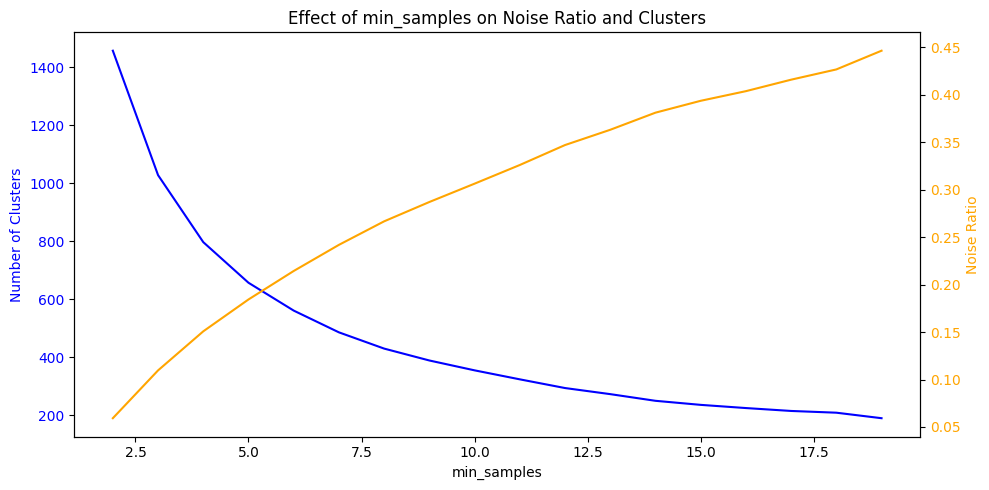

In [26]:

noise_ratios = []
cluster_counts = []

for min_samples in range(2, 20):
    dbscan = DBSCAN(eps=100, min_samples=min_samples)
    labels = dbscan.fit_predict(bike_coords)
    noise_ratio = (labels == -1).sum() / len(labels)
    noise_ratios.append(noise_ratio)
    cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Clusters on the left y-axis
ax1.set_xlabel("min_samples")
ax1.set_ylabel("Number of Clusters", color="blue")
ax1.plot(range(2, 20), cluster_counts, color="blue", label="Number of Clusters")

ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for the Noise Ratio
ax2 = ax1.twinx()
ax2.plot(range(2, 20), noise_ratios, color="orange", label="Noise Ratio")
ax2.set_ylabel("Noise Ratio", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Title and legend
plt.title("Effect of min_samples on Noise Ratio and Clusters")
fig.tight_layout()

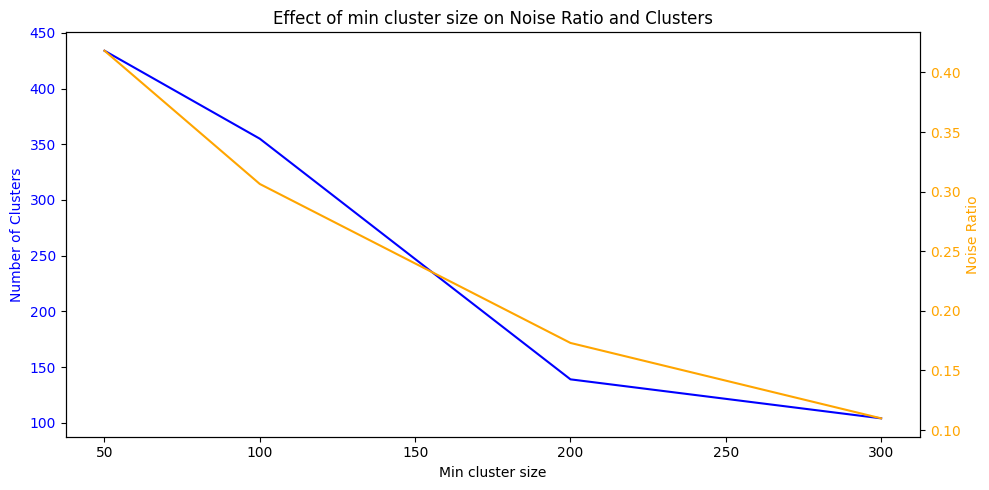

In [27]:
noise_ratios = []
cluster_counts = []

size_of_cluster = [50, 100,200,300]

for min_samples in size_of_cluster:
    dbscan = DBSCAN(eps=min_samples, min_samples=10)
    labels = dbscan.fit_predict(bike_coords)
    noise_ratio = (labels == -1).sum() / len(labels)
    noise_ratios.append(noise_ratio)
    cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Clusters on the left y-axis
ax1.set_xlabel("Min cluster size")
ax1.set_ylabel("Number of Clusters", color="blue")
ax1.plot(size_of_cluster, cluster_counts, color="blue", label="Number of Clusters")

ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for the Noise Ratio
ax2 = ax1.twinx()
ax2.plot(size_of_cluster, noise_ratios, color="orange", label="Noise Ratio")
ax2.set_ylabel("Noise Ratio", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Title and legend
plt.title("Effect of min cluster size on Noise Ratio and Clusters")
fig.tight_layout()

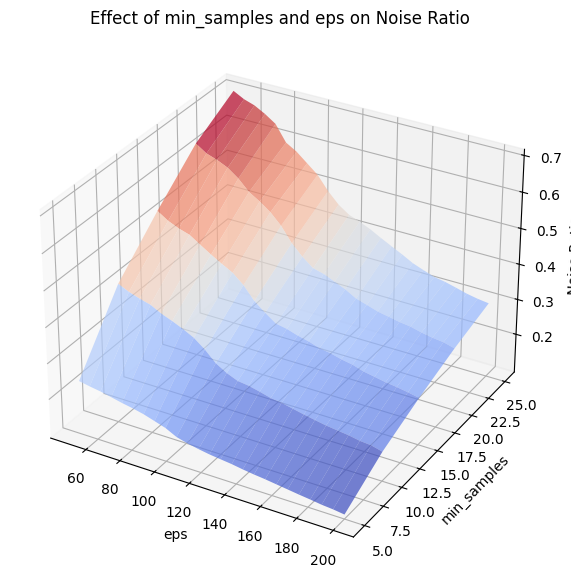

In [28]:
# Define the range of eps and min_samples values
eps_values = np.linspace(50, 200, 25)
min_samples_values = np.arange(5, 30, 5)

# Arrays to store results
noise_ratios = np.zeros((len(min_samples_values), len(eps_values)))
cluster_counts = np.zeros((len(min_samples_values), len(eps_values)))

# Perform DBSCAN clustering for each combination of min_samples and eps
for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(bike_coords)

        # Calculate noise ratio and number of clusters
        noise_ratio = (labels == -1).sum() / len(labels)
        cluster_count = len(set(labels)) - (1 if -1 in labels else 0)

        # Store results in the arrays
        noise_ratios[i, j] = noise_ratio
        cluster_counts[i, j] = cluster_count

# Create a 3D plot to visualize the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for min_samples and eps values
X, Y = np.meshgrid(eps_values, min_samples_values)

# Plot the noise ratio surface
ax.plot_surface(X, Y, noise_ratios, cmap='coolwarm', alpha=0.7)

# Labels and title
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Noise Ratio')
ax.set_title('Effect of min_samples and eps on Noise Ratio')

plt.show()


#### Map a few chosen options

<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


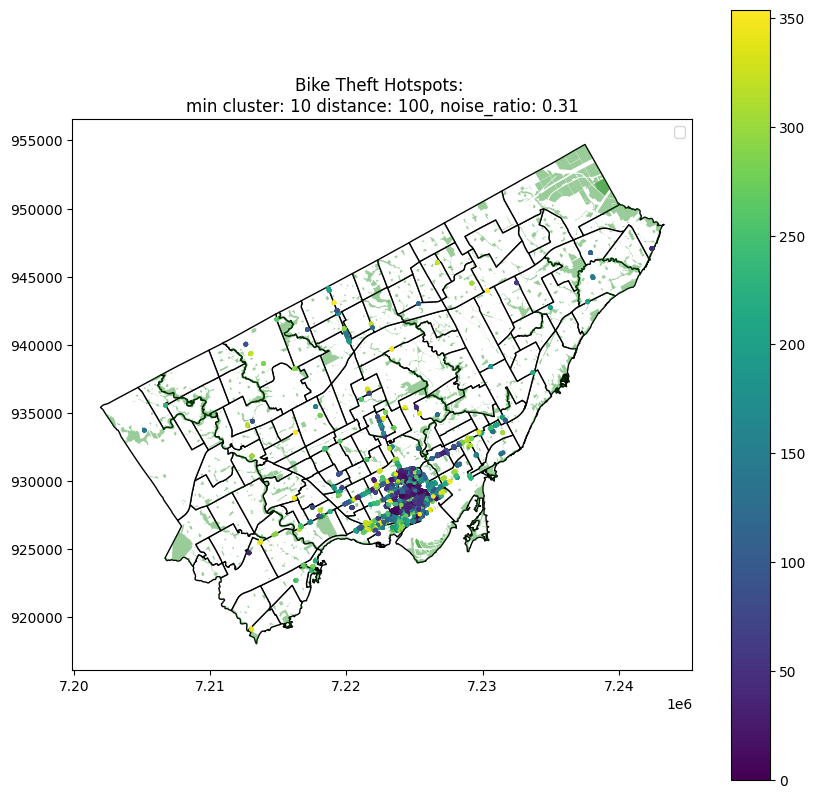

In [29]:
cluster_and_plot(bike_coords,bike,eps=100, min_samples=10, with_noise=False)




In [30]:
cluster_points = bike[bike['cluster'] == 2]
cluster_points.geometry

2        MULTIPOINT (7223819.787 928064.446)
53       MULTIPOINT (7223504.182 927714.784)
99       MULTIPOINT (7223553.207 927949.046)
273      MULTIPOINT (7223463.187 927793.891)
275      MULTIPOINT (7223597.746 927862.325)
                        ...                 
16577     MULTIPOINT (7223419.433 927771.34)
16625    MULTIPOINT (7223525.973 927825.858)
16649    MULTIPOINT (7223761.091 927680.532)
16656    MULTIPOINT (7223504.182 927714.784)
16695    MULTIPOINT (7223697.484 927646.287)
Name: geometry, Length: 217, dtype: geometry

<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


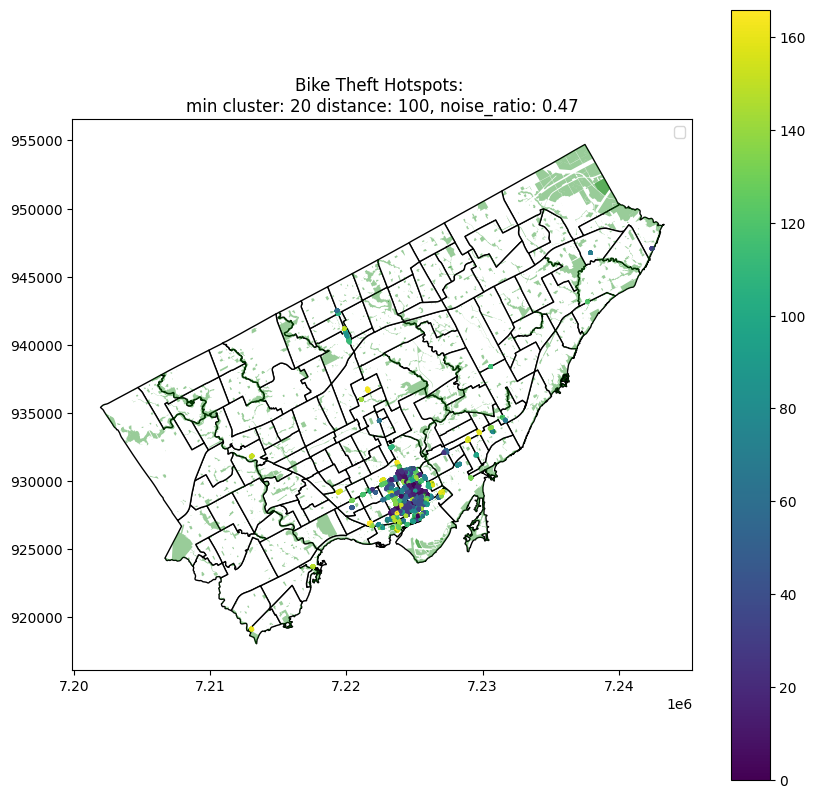

In [31]:
cluster_and_plot(bike_coords, bike,eps=100, min_samples=20, with_noise=False)


<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


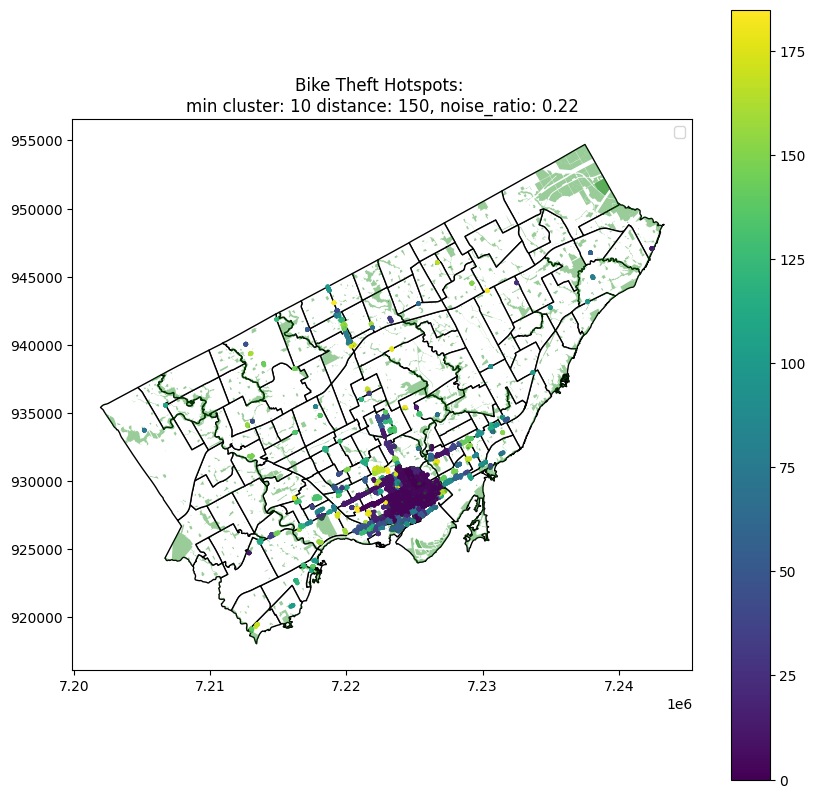

In [32]:
cluster_and_plot(bike_coords, bike,eps=150, min_samples=10, with_noise=False)


In [33]:
bike = cluster_df(bike_coords,bike,eps=100, min_samples=10)

In [ ]:
interactive_cluster_map(bike, save_to_file=True)

### Cars

In [35]:
car_coords = np.array(list(car.explode(index_parts=False).geometry.apply(lambda geom: (geom.x, geom.y))))


#### Evaluate parameters
Evaluate effect of min sample and size (in m) of cluster on noise ratio

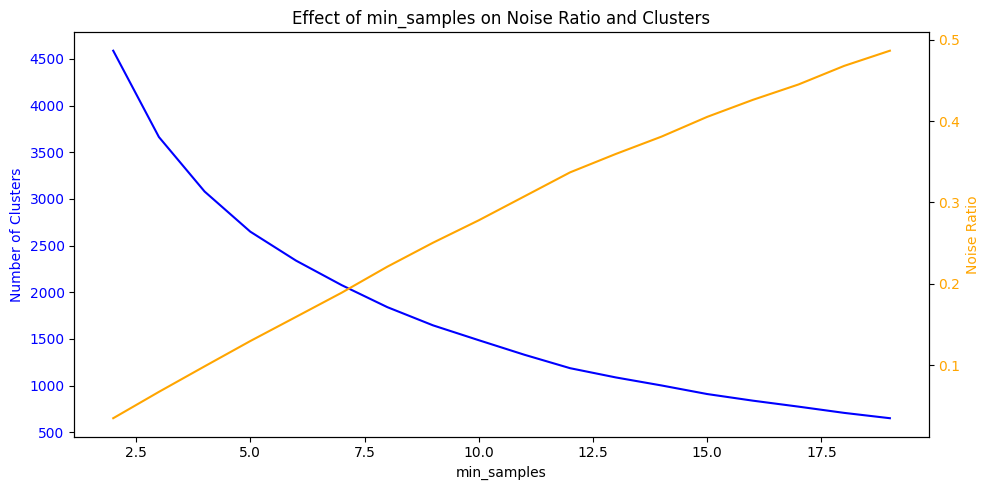

In [36]:

noise_ratios = []
cluster_counts = []

for min_samples in range(2, 20):
    dbscan = DBSCAN(eps=100, min_samples=min_samples)
    labels = dbscan.fit_predict(car_coords)
    noise_ratio = (labels == -1).sum() / len(labels)
    noise_ratios.append(noise_ratio)
    cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Clusters on the left y-axis
ax1.set_xlabel("min_samples")
ax1.set_ylabel("Number of Clusters", color="blue")
ax1.plot(range(2, 20), cluster_counts, color="blue", label="Number of Clusters")

ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for the Noise Ratio
ax2 = ax1.twinx()
ax2.plot(range(2, 20), noise_ratios, color="orange", label="Noise Ratio")
ax2.set_ylabel("Noise Ratio", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Title and legend
plt.title("Effect of min_samples on Noise Ratio and Clusters")
fig.tight_layout()

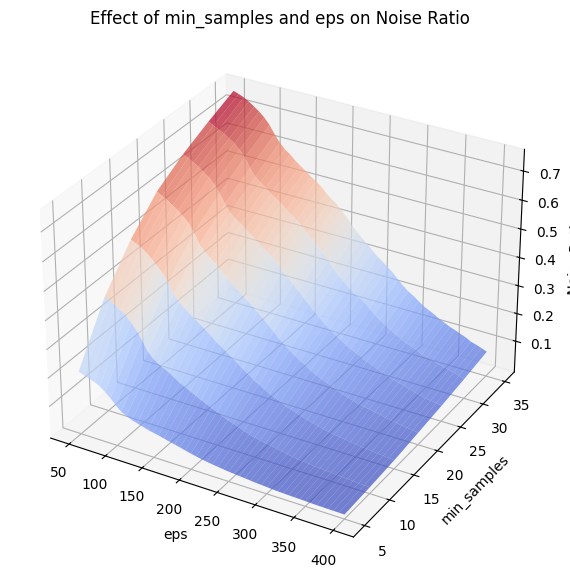

In [37]:
# Define the range of eps and min_samples values
eps_values = np.linspace(50, 400, 50)
min_samples_values = np.arange(5, 40, 5)

# Arrays to store results
noise_ratios = np.zeros((len(min_samples_values), len(eps_values)))
cluster_counts = np.zeros((len(min_samples_values), len(eps_values)))

# Perform DBSCAN clustering for each combination of min_samples and eps
for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(car_coords)

        # Calculate noise ratio and number of clusters
        noise_ratio = (labels == -1).sum() / len(labels)
        cluster_count = len(set(labels)) - (1 if -1 in labels else 0)

        # Store results in the arrays
        noise_ratios[i, j] = noise_ratio
        cluster_counts[i, j] = cluster_count

# Create a 3D plot to visualize the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for min_samples and eps values
X, Y = np.meshgrid(eps_values, min_samples_values)

# Plot the noise ratio surface
ax.plot_surface(X, Y, noise_ratios, cmap='coolwarm', alpha=0.7)

# Labels and title
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Noise Ratio')
ax.set_title('Effect of min_samples and eps on Noise Ratio')

plt.show()


#### Map a few chosen options

<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


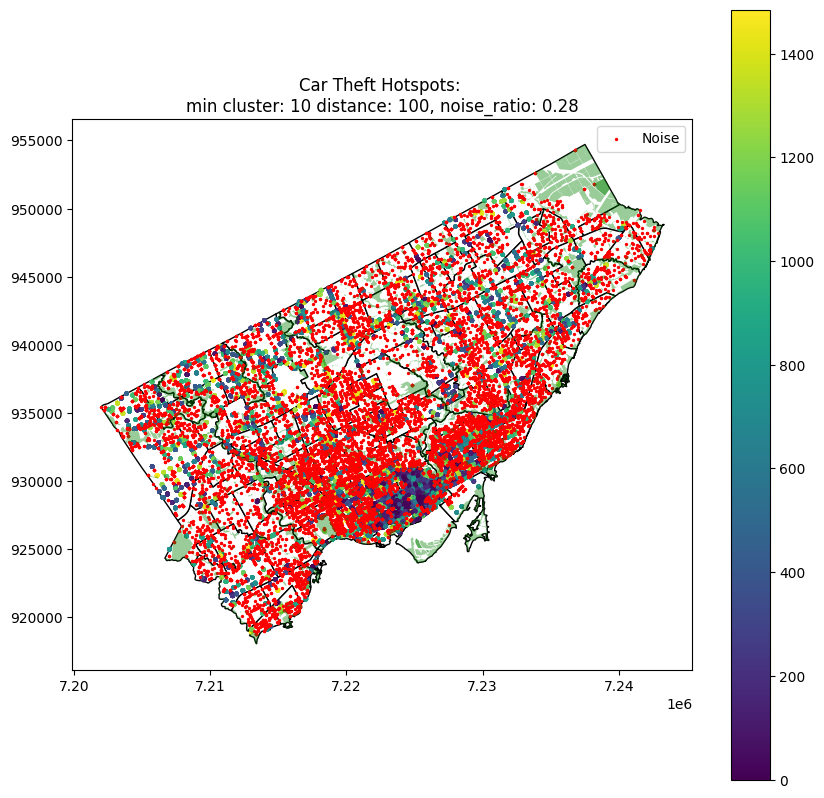

In [38]:
cluster_and_plot(car_coords,car,eps=100, min_samples=10, theft_type='Car')



<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


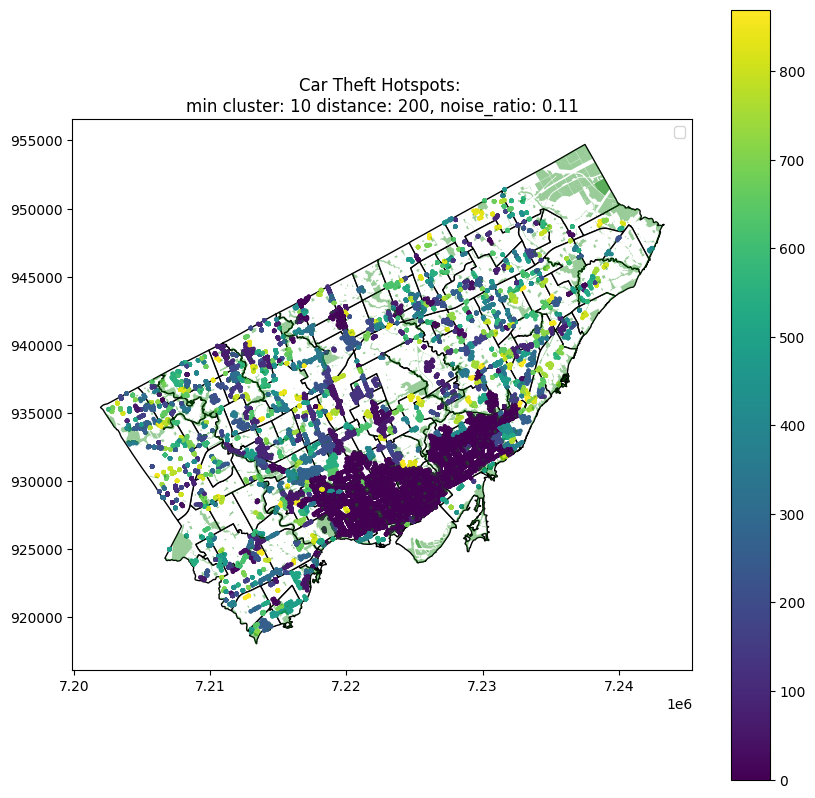

In [39]:
cluster_and_plot(car_coords,car,eps=200, min_samples=10, theft_type='Car', with_noise=False)



<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


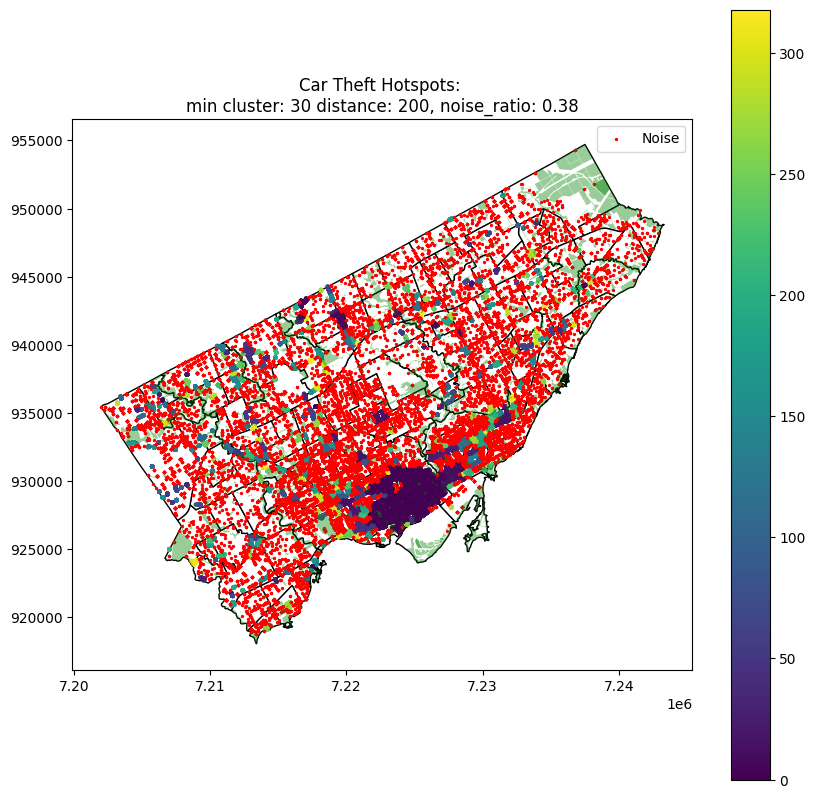

In [40]:
cluster_and_plot(car_coords,car,eps=200, min_samples=30, theft_type='Car')


<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


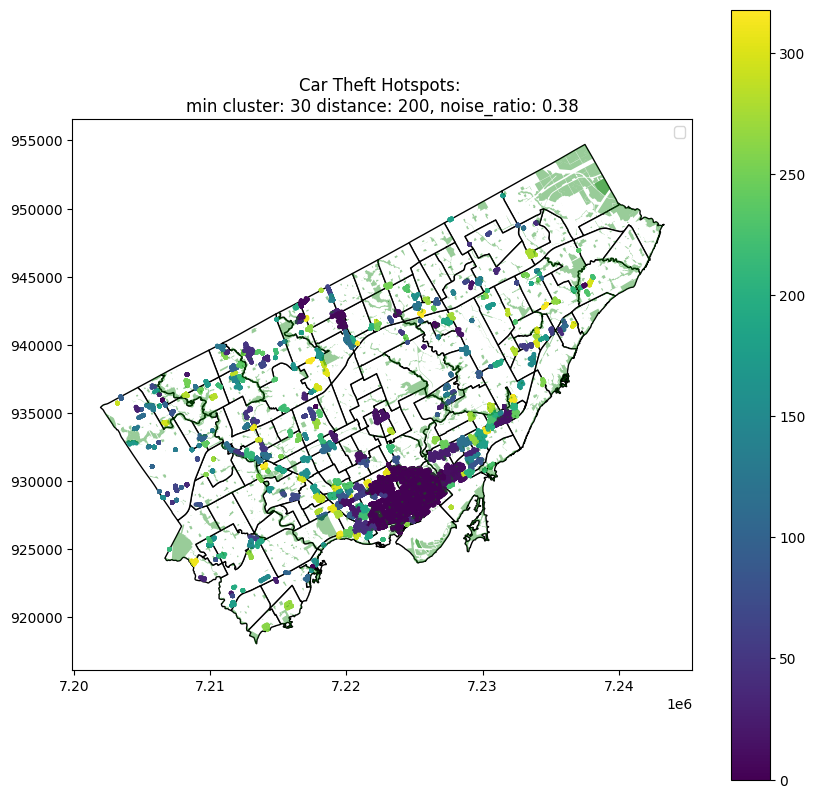

In [41]:
cluster_and_plot(car_coords,car,eps=200, min_samples=30, theft_type='Car', with_noise=False)


<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


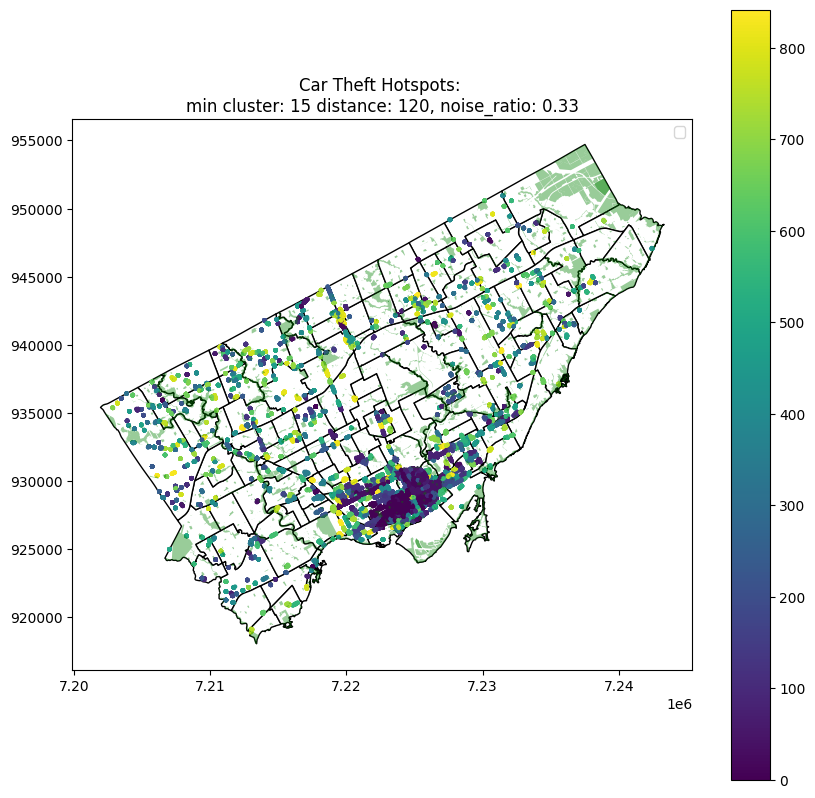

In [42]:
cluster_and_plot(car_coords,car,eps=120, min_samples=15, theft_type='Car', with_noise=False)


<ipython-input-22-5d423e2baea5>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


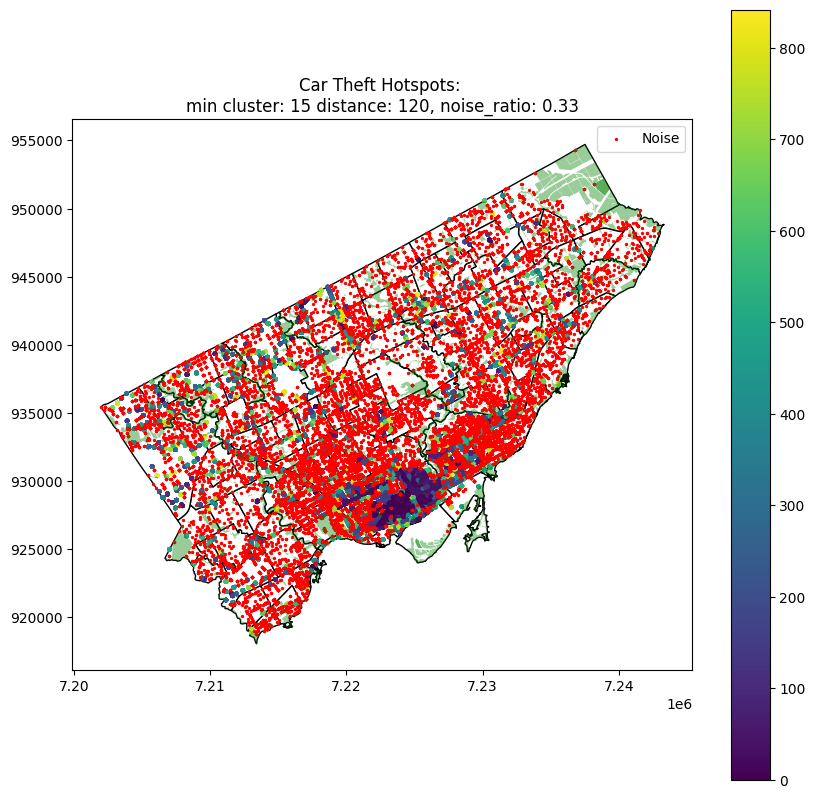

In [43]:
cluster_and_plot(car_coords,car,eps=120, min_samples=15, theft_type='Car')


In [ ]:
interactive_cluster_map(car, save_to_file=True)

## Car Park analysis

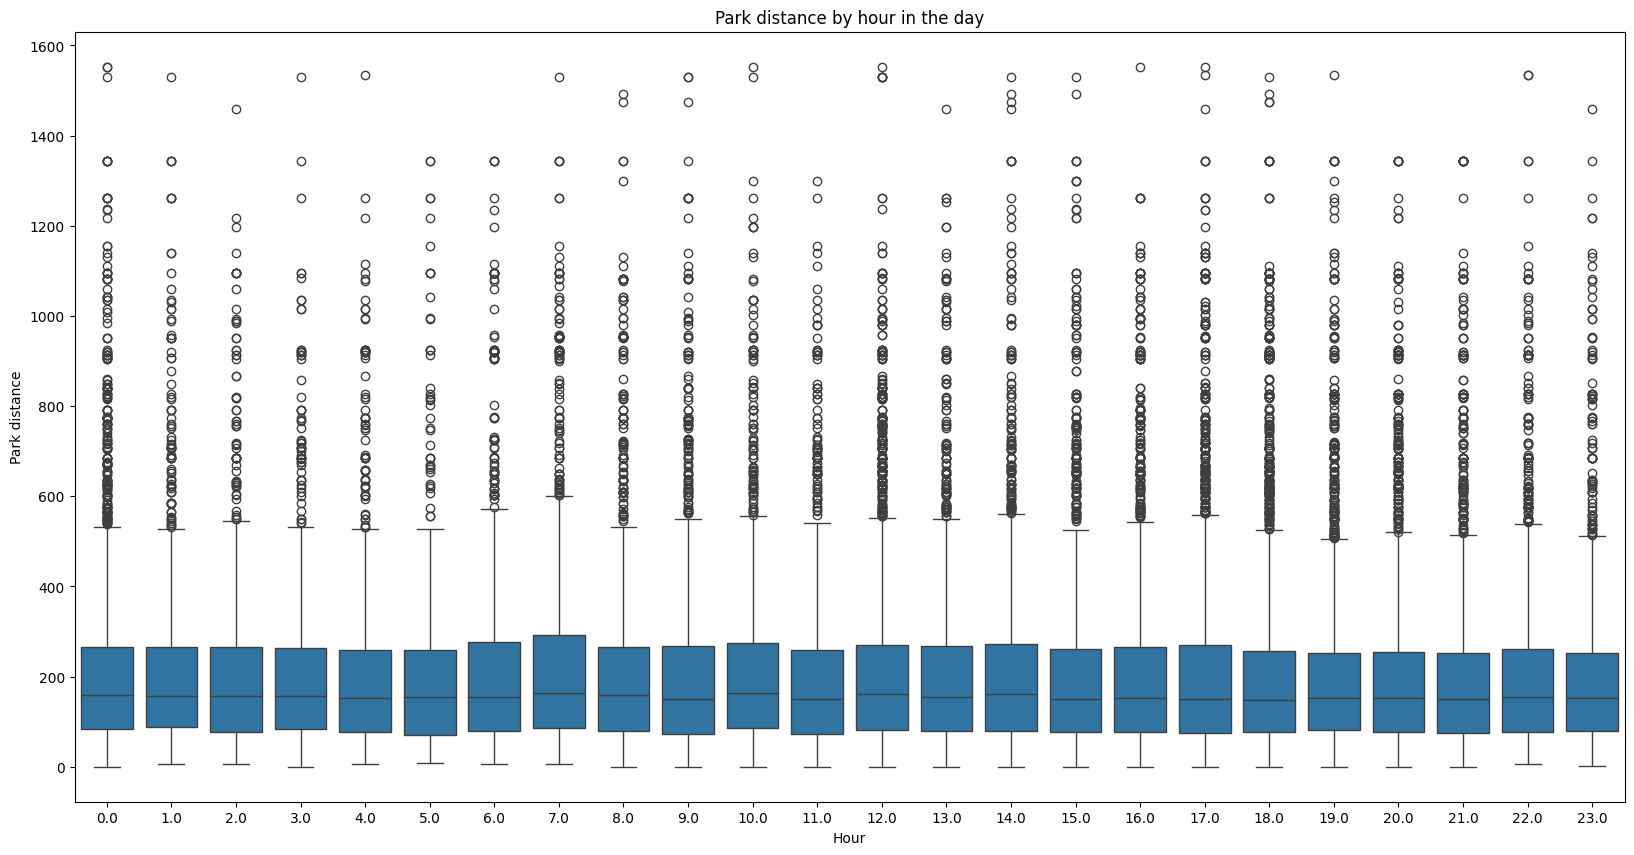

In [ ]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=car, x='OCC_HOUR', y='closest_park_distance')
plt.xlabel("Hour")
plt.ylabel("Park distance")
plt.title("Park distance by hour in the day")
plt.show()


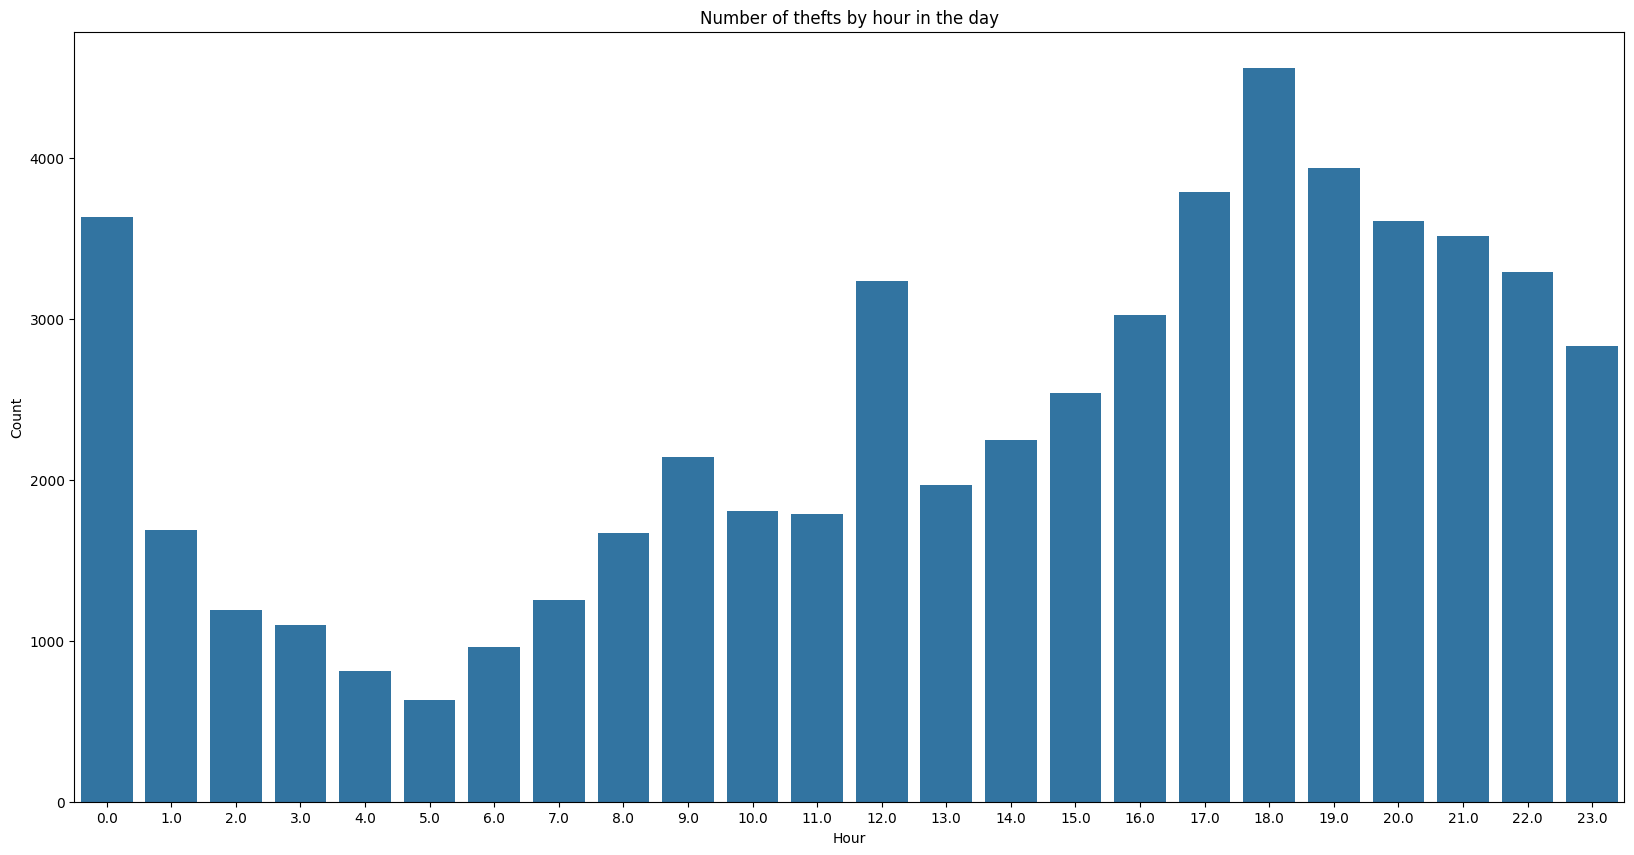

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data=car, x='OCC_HOUR')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of thefts by hour in the day")
plt.show()


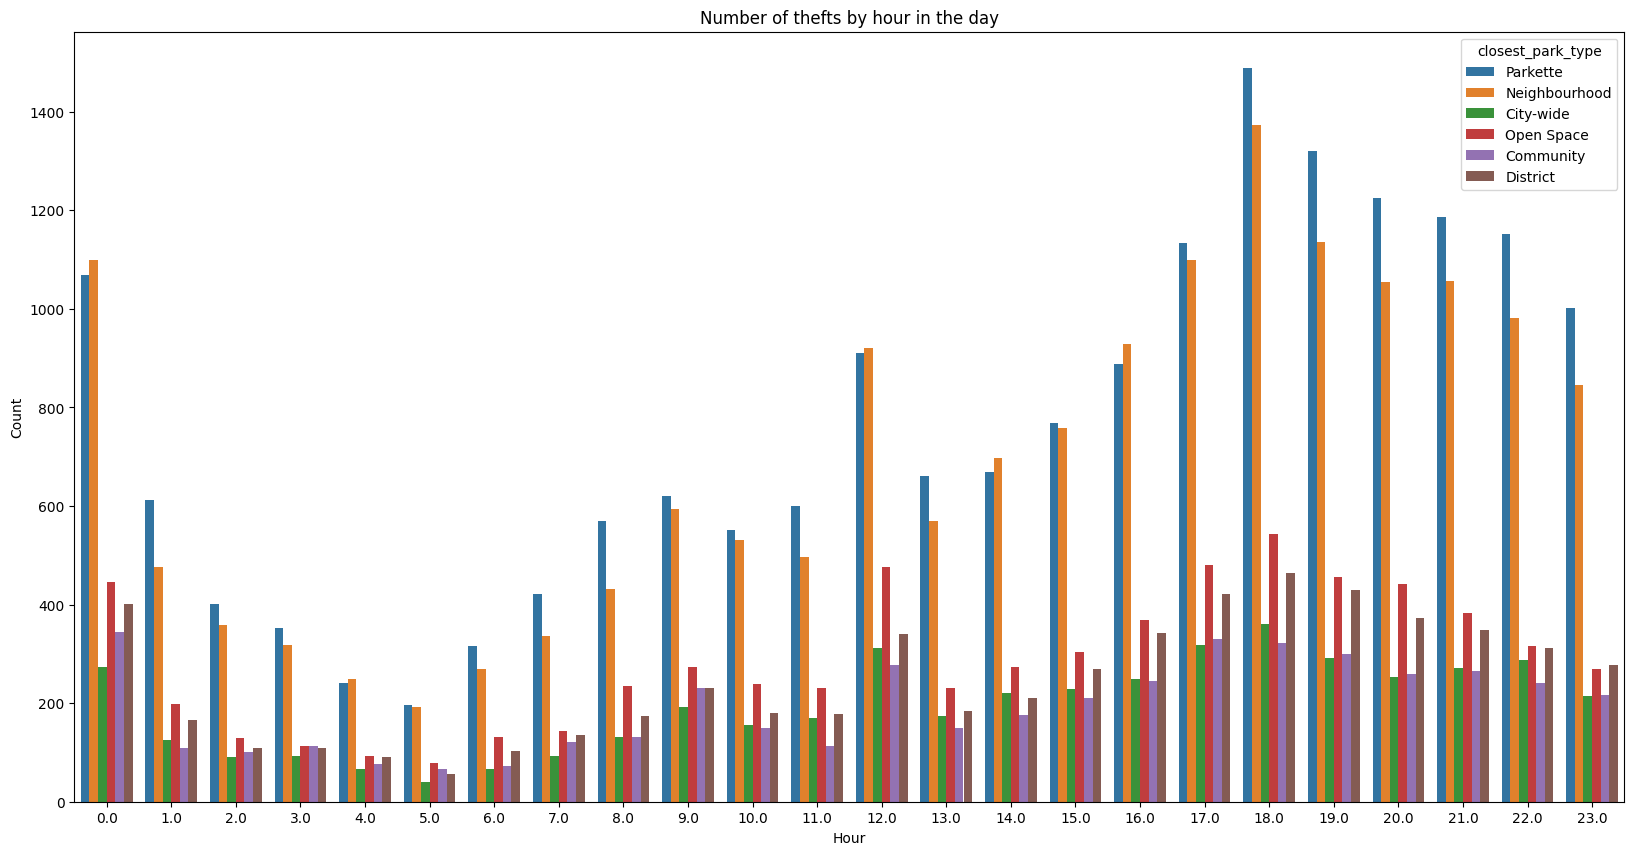

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data=car, x='OCC_HOUR',hue='closest_park_type')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of thefts by hour in the day")
plt.show()


In [ ]:
car['OCC_DAY'].value_counts()

OCC_DAY
1.00     2253
10.00    2033
15.00    1996
17.00    1973
7.00     1962
13.00    1958
6.00     1945
20.00    1937
8.00     1934
18.00    1927
5.00     1921
9.00     1919
19.00    1911
22.00    1910
16.00    1905
14.00    1897
11.00    1889
21.00    1888
23.00    1885
12.00    1873
24.00    1867
4.00     1846
25.00    1821
3.00     1796
27.00    1776
2.00     1748
26.00    1710
28.00    1628
29.00    1578
30.00    1539
31.00     963
Name: count, dtype: int64

##Park analysis

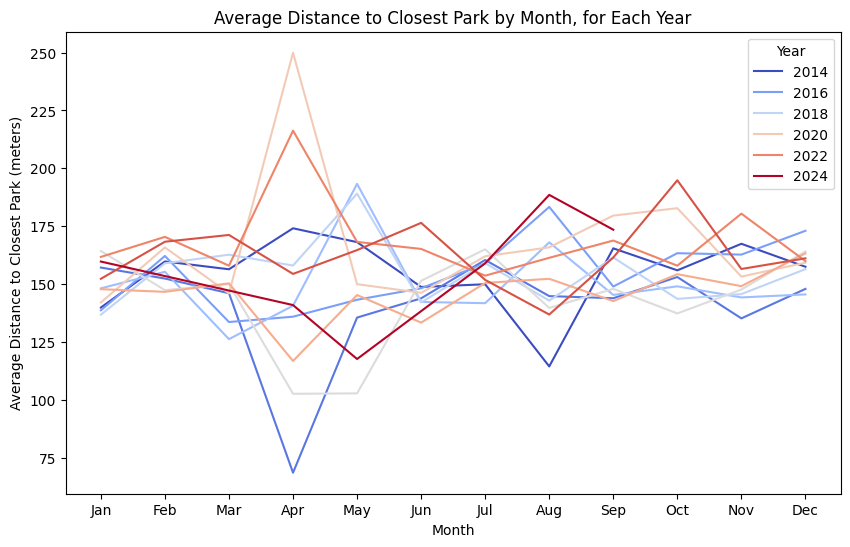

In [ ]:
plt.figure(figsize=(10, 6))

monthly_avg = bike.groupby(['OCC_YEAR', 'OCC_MONTH'])['closest_park_distance'].mean().reset_index()

sns.lineplot(data=monthly_avg, x='OCC_MONTH', y='closest_park_distance', hue='OCC_YEAR', palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Average Distance to Closest Park (meters)")
plt.title("Average Distance to Closest Park by Month, for Each Year")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title="Year")
plt.show()


In [ ]:
bike['PRIMARY_OFFENCE'].value_counts().head(50)

PRIMARY_OFFENCE
THEFT UNDER                       7767
THEFT UNDER - BICYCLE             7263
THEFT OF EBIKE UNDER $5000         921
B&E                                262
THEFT FROM MOTOR VEHICLE UNDER     158
THEFT OVER - BICYCLE                76
THEFT OF EBIKE OVER $5000           57
THEFT UNDER - SHOPLIFTING           53
POSSESSION PROPERTY OBC UNDER       51
THEFT OF MOTOR VEHICLE              43
THEFT OVER                          40
ROBBERY - MUGGING                   36
ROBBERY - OTHER                     33
THEFT FROM MOTOR VEHICLE OVER       29
B&E W'INTENT                        27
FTC PROBATION ORDER                 24
FRAUD OVER                          23
PROPERTY - LOST                     19
ROBBERY - SWARMING                  16
ROBBERY WITH WEAPON                 15
MISCHIEF UNDER                      15
SUSPICIOUS INCIDENT                  9
PROPERTY - RECOVERED                 8
FTC WITH CONDITIONS                  8
INCIDENT                             7
MISCHIEF TO VEHICLE                  6
POSSESSION HOUSE BREAK INSTRUM       5
FRAUD UNDER                          5
ASSAULT                              5
ASSAULT WITH WEAPON                  4
INVALID GO - RMS ONLY                4
THREAT - PERSON                      3
FIREARM - UNAUTHORIZED POSSESS       3
MISCHIEF - INTERFERE W-PROP          2
ROBBERY - DELIVERY PERSON            2
ROBBERY - BUSINESS                   2
ASSAULT - RESIST/ PREVENT SEIZ       2
DRUG - TRAF OTHER (SCHD I)           2
CARELESS DRIVING- HTA                2
DRUG - POSS METH (SCHD I)            2
AGGRAVATED ASLT PEACE OFFICER        1
FRAUD - IDENTITY/PERS W-INT          1
B&E OUT                              1
THEFT UNDER - DISTRACTION            1
TRAFFICKING PROPERTY OBC OVER        1
SEXUAL ASSAULT                       1
OBSTRUCT PEACE OFFICER               1
MVC-PERSONAL INJURY                  1
THEFT OVER - SHOPLIFTING             1
INFORMATION ONLY                     1
Name: count, dtype: int64

In [ ]:
map_6 = folium.Map(location=[43.6426, -79.3871],
                   tiles='cartodbpositron',
                   zoom_start=10)

# Add points to the map
HeatMap(data=list(zip(bike.geometry.to_crs(epsg=4326).geometry.explode().y,
                      bike.geometry.to_crs(epsg=4326).geometry.explode().x)),
        radius=20).add_to(map_6)

# Display map
map_6

# Archive



In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe


In [ ]:
place_name = "Golden Horseshoe, ON, Canada"
place_name = "Toronto, ON, Canada"

area = ox.geocode_to_gdf(place_name)

area

geometry  bbox_west  bbox_south  \
0  POLYGON ((-79.63928 43.74984, -79.63853 43.749...     -79.64       43.58   

   bbox_east  bbox_north   place_id  osm_type  osm_id   lat    lon     class  \
0     -79.11       43.86  323677062  relation  324211 43.65 -79.38  boundary   

             type  place_rank  importance addresstype     name  \
0  administrative          12        0.77        city  Toronto   

                                 display_name  
0  Toronto, Golden Horseshoe, Ontario, Canada

<Axes: >

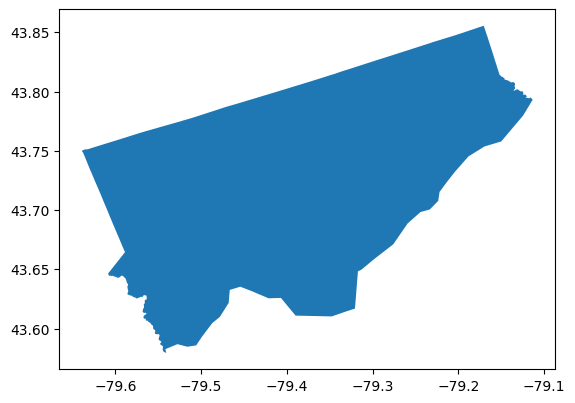

In [ ]:
area.plot()


In [ ]:
tags = {'building': True}

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()


AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

In [ ]:
len(buildings)

In [ ]:
buildings.plot()


In [ ]:
!pip install folium

In [ ]:
import folium
m = folium.Map(location=[43.6426, -79.3871], zoom_start=10)
for _, r in parks.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(m)
m
